<a href="https://colab.research.google.com/github/Shahsawar51/MY_DATA_SCIENCE_JOURNEY/blob/main/wk29_matrix_paractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

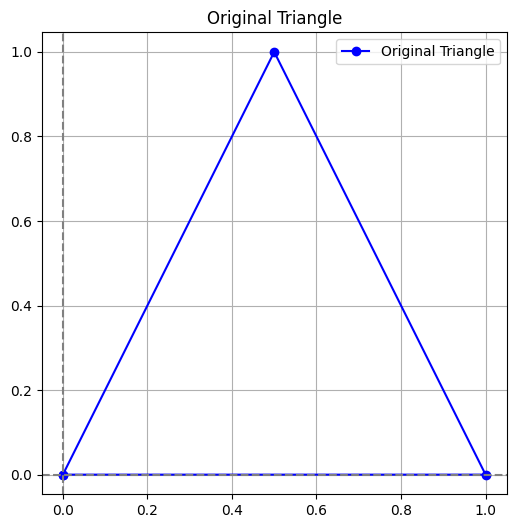

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define a simple triangle (3 points)
triangle = np.array([
    [0, 0],
    [1, 0],
    [0.5, 1],
    [0, 0]   # back to start to close the triangle
])

# Define an orthogonal rotation matrix (90° counter-clockwise)
# theta = np.radians(90)
# rotation_matrix = np.array([
#     [np.cos(theta), -np.sin(theta)],
#     [np.sin(theta),  np.cos(theta)]
# ])

# Apply the rotation matrix to all points
# rotated_triangle = triangle @ rotation_matrix.T

# Step 2: Plot original triangle
plt.figure(figsize=(6, 6))
plt.plot(triangle[:, 0], triangle[:, 1], 'bo-', label='Original Triangle')
# plt.plot(rotated_triangle[:, 0], rotated_triangle[:, 1], 'ro-', label='Rotated Triangle (90°)')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.legend()
plt.title('Original Triangle')
plt.axis('equal')
plt.show()

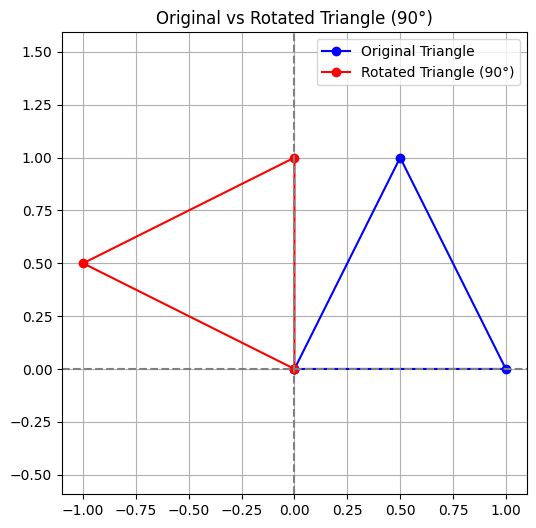

In [ ]:
# Define an orthogonal rotation matrix (90° counter-clockwise)
theta = np.radians(90)
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta),  np.cos(theta)]
])

# Apply the rotation matrix to all points
rotated_triangle = triangle @ rotation_matrix.T

# Plot original and rotated triangles
plt.figure(figsize=(6, 6))
plt.plot(triangle[:, 0], triangle[:, 1], 'bo-', label='Original Triangle')
plt.plot(rotated_triangle[:, 0], rotated_triangle[:, 1], 'ro-', label='Rotated Triangle (90°)')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.legend()
plt.title('Original vs Rotated Triangle (90°)')
plt.axis('equal')
plt.show()

# Task
Create a 3D shape, apply a transformation to it, and visualize both the original and transformed shapes.

## Create 3d shape

### Subtask:
Define the vertices of a simple 3D shape (like a cube or a pyramid) using `numpy` in a new code cell.


**Reasoning**:
Define the vertices of a 3D cube using numpy.



In [ ]:
# Define the vertices of a simple 3D cube (8 points)
cube_vertices = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
])

print("Cube Vertices:")
print(cube_vertices)

Cube Vertices:
[[0 0 0]
 [1 0 0]
 [1 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 1]
 [1 1 1]
 [0 1 1]]


## Define and apply transformation

### Subtask:
In a new code cell, define a 3D transformation matrix (e.g., for rotation or translation) and apply it to the 3D shape's vertices.


**Reasoning**:
Define a 4x4 transformation matrix for a translation and apply it to the cube vertices using homogeneous coordinates.



In [ ]:
# Define a 4x4 translation matrix for 3D space
# Translate by (2, 3, 4)
translation_matrix = np.array([
    [1, 0, 0, 2],
    [0, 1, 0, 3],
    [0, 0, 1, 4],
    [0, 0, 0, 1]
])

# Convert cube_vertices to homogeneous coordinates by adding a column of ones
cube_vertices_homogeneous = np.hstack((cube_vertices, np.ones((cube_vertices.shape[0], 1))))

# Apply the transformation matrix
transformed_cube_vertices_homogeneous = cube_vertices_homogeneous @ translation_matrix.T

# Convert back to Cartesian coordinates by taking the first three columns
transformed_cube_vertices = transformed_cube_vertices_homogeneous[:, :3]

print("Transformed Cube Vertices:")
print(transformed_cube_vertices)

Transformed Cube Vertices:
[[2. 3. 4.]
 [3. 3. 4.]
 [3. 4. 4.]
 [2. 4. 4.]
 [2. 3. 5.]
 [3. 3. 5.]
 [3. 4. 5.]
 [2. 4. 5.]]


## Visualize shapes

### Subtask:
Plot both the original and transformed 3D shapes to visualize the effect of the transformation.


**Reasoning**:
Plot both the original and transformed 3D shapes to visualize the effect of the transformation by following the instructions.



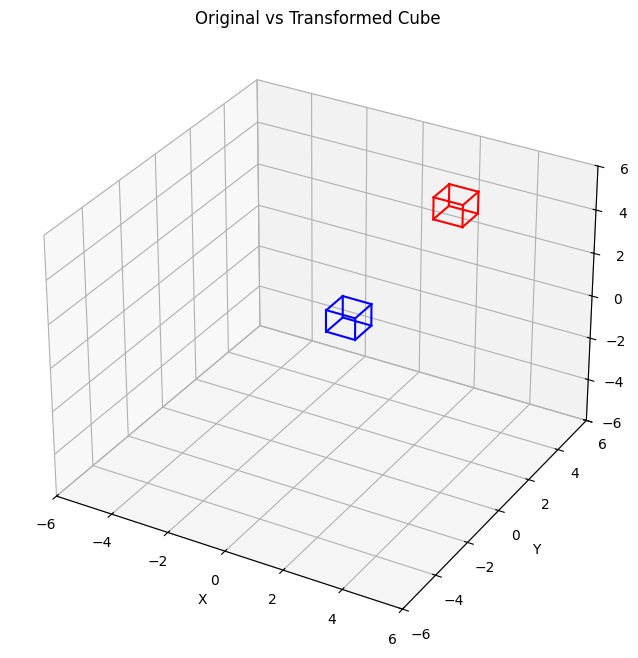

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure and a 3D subplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define the edges of the cube by specifying pairs of vertex indices
edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),  # Bottom face
    (4, 5), (5, 6), (6, 7), (7, 4),  # Top face
    (0, 4), (1, 5), (2, 6), (3, 7)   # Connecting edges
]

# Plot original cube
for edge in edges:
    ax.plot3D(*zip(cube_vertices[edge[0]], cube_vertices[edge[1]]), color="blue")

# Plot transformed cube
for edge in edges:
    ax.plot3D(*zip(transformed_cube_vertices[edge[0]], transformed_cube_vertices[edge[1]]), color="red")

# Set labels for the x, y, and z axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set a title for the plot
ax.set_title('Original vs Transformed Cube')

# Set the limits for the x, y, and z axes to ensure both cubes are visible
all_vertices = np.concatenate((cube_vertices, transformed_cube_vertices))
max_limit = np.max(np.abs(all_vertices)) + 1 # Add some padding
ax.set_xlim([-max_limit, max_limit])
ax.set_ylim([-max_limit, max_limit])
ax.set_zlim([-max_limit, max_limit])

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   A cube's vertices were defined using a NumPy array with shape (8, 3).
*   A 4x4 translation matrix was created to translate the shape by (2, 3, 4) in 3D space.
*   The original vertices were converted to homogeneous coordinates by adding a column of ones before applying the transformation matrix.
*   The transformed vertices were obtained by matrix multiplication and then converted back to Cartesian coordinates.
*   Both the original (blue) and transformed (red) cubes were successfully plotted in a 3D visualization, clearly showing the effect of the translation.

### Insights or Next Steps

*   This process can be extended to other types of 3D transformations like rotation and scaling by defining different transformation matrices.
*   More complex 3D shapes can be visualized using this method by defining their vertices and connectivity (edges or faces).


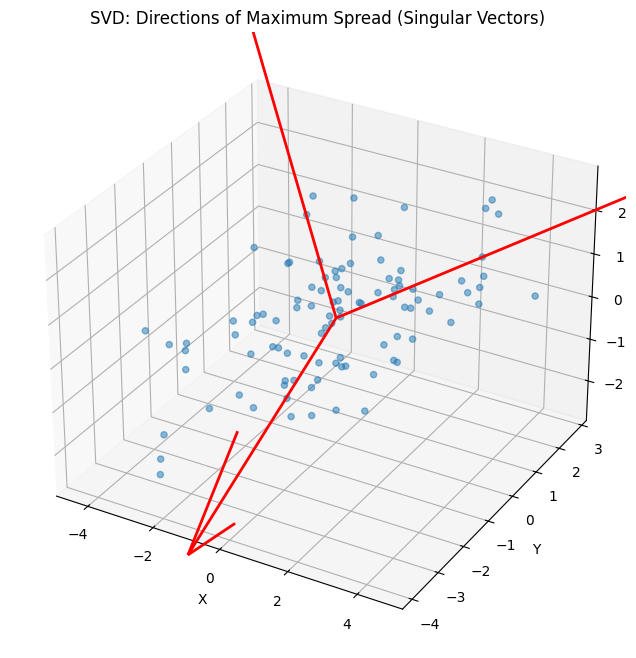

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Generate random 3D data
np.random.seed(0)
mean = [0, 0, 0]
cov = [[3, 1, 1], [1, 2, 0.5], [1, 0.5, 1.5]]  # covariance defines the spread
data = np.random.multivariate_normal(mean, cov, 100)

# Step 2: Center the data (important for SVD/PCA)
data_centered = data - np.mean(data, axis=0)

# Step 3: Perform SVD
U, S, Vt = np.linalg.svd(data_centered)
directions = Vt[:3]  # top 3 principal directions

# Step 4: Plot the point cloud and top singular vectors
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(data_centered[:, 0], data_centered[:, 1], data_centered[:, 2], alpha=0.5)

# Plot singular vector lines (directions of max spread)
origin = np.mean(data_centered, axis=0)

for i in range(3):
    vec = directions[i]
    ax.quiver(*origin, *vec, length=S[i], color='r', linewidth=2)

# Labeling
ax.set_title("SVD: Directions of Maximum Spread (Singular Vectors)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np

# Assuming data_centered, directions, S, and origin are already defined from the previous cell's execution

# Create Plotly figure
fig = go.Figure()

# Add data points as a scatter plot
fig.add_trace(go.Scatter3d(
    x=data_centered[:, 0],
    y=data_centered[:, 1],
    z=data_centered[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.5
    ),
    name='Data Points'
))

# Add singular vector lines
for i in range(3):
    vec = directions[i] * S[i] # Scale the vector by the singular value
    fig.add_trace(go.Scatter3d(
        x=[origin[0], origin[0] + vec[0]],
        y=[origin[1], origin[1] + vec[1]],
        z=[origin[2], origin[2] + vec[2]],
        mode='lines',
        line=dict(
            color='red',
            width=5
        ),
        name=f'Singular Vector {i+1}'
    ))

# Update layout for title and axis labels
fig.update_layout(
    title="SVD: Directions of Maximum Spread (Singular Vectors) in Plotly",
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show the plot
fig.show()

In [ ]:
# Project data points onto each singular vector
projected_points = np.zeros_like(data_centered)
for i in range(3):
    # Project each data point onto the i-th singular vector
    # The projection of a vector 'a' onto a vector 'b' is given by: (a . b / ||b||^2) * b
    # Since 'directions' are unit vectors, ||b||^2 = 1, so it simplifies to (a . b) * b
    projection_on_vec = (data_centered @ directions[i])[:, np.newaxis] * directions[i]
    # Add the projected points onto the origin for visualization
    projected_points += projection_on_vec + origin

# Create Plotly figure to visualize original and projected points
fig = go.Figure()

# Add original data points
fig.add_trace(go.Scatter3d(
    x=data_centered[:, 0],
    y=data_centered[:, 1],
    z=data_centered[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.3,
        color='blue'
    ),
    name='Original Data Points'
))

# Add the singular vector lines (optional, for reference)
for i in range(3):
    vec = directions[i] * S[i]
    fig.add_trace(go.Scatter3d(
        x=[origin[0], origin[0] + vec[0]],
        y=[origin[1], origin[1] + vec[1]],
        z=[origin[2], origin[2] + vec[2]],
        mode='lines',
        line=dict(
            color='red',
            width=5
        ),
        name=f'Singular Vector {i+1}'
    ))

# Add projected data points
# Since projected_points accumulates projections onto all 3 vectors,
# let's plot the projection onto each individual vector separately for clarity
colors = ['purple', 'orange', 'green']
for i in range(3):
    projection_on_single_vec = (data_centered @ directions[i])[:, np.newaxis] * directions[i] + origin
    fig.add_trace(go.Scatter3d(
        x=projection_on_single_vec[:, 0],
        y=projection_on_single_vec[:, 1],
        z=projection_on_single_vec[:, 2],
        mode='markers',
        marker=dict(
            size=3,
            opacity=0.8,
            color=colors[i]
        ),
        name=f'Projected on Singular Vector {i+1}'
    ))


# Update layout
fig.update_layout(
    title="Original Data Points and Projections onto Singular Vectors",
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()